# Ngrams and Common Spanish Word Phrases

In [6]:
import pandas as pd
df = pd.read_excel("Top_Latin_Songs.xlsx")
df.head()

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year
0,Masterpiece,https://genius.com/albums/Rkm-and-ken-y/Master...,RKM & Ken-Y,[],"[Letra de ""Down""] [Intro] Down, down, down, d...","[{'type': 'video', 'url': 'http://www.youtube....",1,2006-02-14,Down,https://genius.com/Rkm-and-ken-y-down-lyrics,[{'header_image_url': 'https://images.genius.c...,2006
1,Oral Fixation Vol. 2,https://genius.com/albums/Shakira/Oral-fixatio...,Shakira Featuring Wyclef Jean,[{'header_image_url': 'https://images.genius.c...,[Intro: Wyclef Jean] Ladies up in here tonight...,"[{'type': 'video', 'url': 'http://www.youtube....",2,2005-11-28,Hips Don't Lie,https://genius.com/Shakira-hips-dont-lie-lyrics,[{'header_image_url': 'https://assets.genius.c...,2006
2,Barrio Fino En Directo,https://genius.com/albums/Daddy-yankee/Barrio-...,Daddy Yankee,[],"[Letra de ""Rompe""] [Intro] You know Los capos...",[{'url': 'https://open.spotify.com/track/4Xtlw...,3,2005-09-30,Rompe,https://genius.com/Daddy-yankee-rompe-lyrics,[{'header_image_url': 'https://images.genius.c...,2006
3,Aliado Del Tiempo,https://genius.com/albums/Mariano-barba/Aliado...,Mariano Barba,[],Tengo ganas de tocarte Todo tu cuerpo Ser alia...,[],4,NaN,Aliado Del Tiempo,https://genius.com/Mariano-barba-aliado-del-ti...,[],2006
4,Pa'l Mundo,https://genius.com/albums/Wisin-and-yandel/Pa-...,Wisin & Yandel,[],"[Letra de ""Llamé Pa' Verte (Bailando Sexy)""] ...","[{'type': 'video', 'url': 'http://www.youtube....",5,2005-11-08,Llame Pa' Verte,https://genius.com/Wisin-and-yandel-llame-pa-v...,[{'header_image_url': 'https://images.genius.c...,2006


In [2]:
#use SpaCy to tag named entities and later remove from lyrics
import spacy
from spacy import displacy
from collections import Counter
import es_core_news_sm
nlp = es_core_news_sm.load()

In [3]:
#named entity recognition test
from pprint import pprint
doc = nlp('Sebastian Yatra, Jonas Brothers, Natti Natasha and Daddy Yankee released “Runaway” late Thursday (June 20), and the accompanying music video will make fans very happy. 2019 , Billboard , Daddy Yankee , Jonas Brothers , Music News , Natti NAtasha , News , billboard news , music ')
pprint([(X.text, X.label_) for X in doc.ents])

[('Sebastian Yatra', 'PER'),
 ('Jonas Brothers', 'PER'),
 ('Natti Natasha and Daddy Yankee', 'PER'),
 ('Runaway', 'MISC'),
 ('Thursday', 'ORG'),
 ('June 20', 'LOC'),
 ('Billboard', 'ORG'),
 ('Daddy Yankee', 'ORG'),
 ('Jonas Brothers', 'ORG'),
 ('Music News', 'ORG'),
 ('Natti NAtasha', 'PER'),
 ('News', 'PER')]


In [4]:
def extract_named_ents(text):
    """Extract named entities"""
    return [(ent.text, ent.label_) for ent in nlp(text).ents]

def add_named_ents(df):
    """Create new column in data frame with named entity tuple extracted"""
    df['named_ents'] = df['Lyrics'].apply(extract_named_ents)    

In [23]:
#add_named_ents(df)
#display(df)

In [ ]:
df['named_ents'][0] #imperfect results, all capitalized words were picked up by SpaCy

In [25]:
#prepare list of artist names to be removed from lyrics as workaround
artist = df['Artist'].str.split().tolist()

In [10]:
def flattenList(data):
    results = []
    for rec in data:
        if isinstance(rec, list):
            results.extend(rec)
            results = flattenList(results)
        else:
            results.append(rec)
    return results

In [11]:
all_artist = flattenList(artist) #flatten nested lists into one list

In [26]:
#all_artist view the names

In [15]:
artists = df['Artist'].tolist()

In [16]:
names = r'\b(?:{})\b'.format('|'.join(artists)) #removes list of names from rows
df['Lyrics_nonames'] = df['Lyrics'].str.replace(names, '')

In [17]:
df['Lyrics_clean'] = df['Lyrics_nonames'].str.replace('\d+', '') #removes numbers
df['Lyrics_clean'] = df['Lyrics_clean'].apply(lambda x: " ".join(x.lower() for x in str(x).split())) #lower case
df['Lyrics_clean'] = df['Lyrics_clean'].str.replace('[^\w\s]','') #removes punctuation
df['Lyrics_clean'] = df['Lyrics_clean'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1') #removes consecutive duplicates
df.head()

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Lyrics_nonames,Lyrics_clean
0,Masterpiece,https://genius.com/albums/Rkm-and-ken-y/Master...,RKM & Ken-Y,[],"[Letra de ""Down""] [Intro] Down, down, down, d...","[{'type': 'video', 'url': 'http://www.youtube....",1,2006-02-14,Down,https://genius.com/Rkm-and-ken-y-down-lyrics,[{'header_image_url': 'https://images.genius.c...,2006,"[Letra de ""Down""] [Intro] Down, down, down, d...",letra de down intro down precoro hoy he desper...
1,Oral Fixation Vol. 2,https://genius.com/albums/Shakira/Oral-fixatio...,Shakira Featuring Wyclef Jean,[{'header_image_url': 'https://images.genius.c...,[Intro: Wyclef Jean] Ladies up in here tonight...,"[{'type': 'video', 'url': 'http://www.youtube....",2,2005-11-28,Hips Don't Lie,https://genius.com/Shakira-hips-dont-lie-lyrics,[{'header_image_url': 'https://assets.genius.c...,2006,[Intro: Wyclef Jean] Ladies up in here tonight...,intro wyclef jean ladies up in here tonight no...
2,Barrio Fino En Directo,https://genius.com/albums/Daddy-yankee/Barrio-...,Daddy Yankee,[],"[Letra de ""Rompe""] [Intro] You know Los capos...",[{'url': 'https://open.spotify.com/track/4Xtlw...,3,2005-09-30,Rompe,https://genius.com/Daddy-yankee-rompe-lyrics,[{'header_image_url': 'https://images.genius.c...,2006,"[Letra de ""Rompe""] [Intro] You know Los capos...",letra de rompe intro you know los capos están ...
3,Aliado Del Tiempo,https://genius.com/albums/Mariano-barba/Aliado...,Mariano Barba,[],Tengo ganas de tocarte Todo tu cuerpo Ser alia...,[],4,NaN,Aliado Del Tiempo,https://genius.com/Mariano-barba-aliado-del-ti...,[],2006,Tengo ganas de tocarte Todo tu cuerpo Ser alia...,tengo ganas de tocarte todo tu cuerpo ser alia...
4,Pa'l Mundo,https://genius.com/albums/Wisin-and-yandel/Pa-...,Wisin & Yandel,[],"[Letra de ""Llamé Pa' Verte (Bailando Sexy)""] ...","[{'type': 'video', 'url': 'http://www.youtube....",5,2005-11-08,Llame Pa' Verte,https://genius.com/Wisin-and-yandel-llame-pa-v...,[{'header_image_url': 'https://images.genius.c...,2006,"[Letra de ""Llamé Pa' Verte (Bailando Sexy)""] ...",letra de llamé pa verte bailando sexy intro he...


In [18]:
df[df['Lyrics_clean'].str.contains('shaky')]

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Lyrics_nonames,Lyrics_clean
763,Just Dance 2019 Official Tracklist,https://genius.com/albums/Ubisoft/Just-dance-2...,Daddy Yankee,[],Letra de Shaky Shaky [Intro] 'Tamo en vivo Su...,"[{'type': 'video', 'url': 'http://www.youtube....",8,2016-04-08,Shaky Shaky,https://genius.com/Daddy-yankee-shaky-shaky-ly...,[{'header_image_url': 'https://images.genius.c...,2016,Letra de Shaky Shaky [Intro] 'Tamo en vivo Su...,letra de shaky intro tamo en vivo sube el mic ...
888,Just Dance 2019 Official Tracklist,https://genius.com/albums/Ubisoft/Just-dance-2...,Daddy Yankee,[],Letra de Shaky Shaky [Intro] 'Tamo en vivo Su...,"[{'type': 'video', 'url': 'http://www.youtube....",33,2016-04-08,Shaky Shaky,https://genius.com/Daddy-yankee-shaky-shaky-ly...,[{'header_image_url': 'https://images.genius.c...,2017,Letra de Shaky Shaky [Intro] 'Tamo en vivo Su...,letra de shaky intro tamo en vivo sube el mic ...


In [19]:
df['Lyrics_clean'][763] #consecutive duplicate words were removed

'letra de shaky intro tamo en vivo sube el mic que vamo que vamo que vamos pa la gozadera full baby coro shaky cómo es dame una vueltita otra vez shaky tú la vez como hace lo suyo tú la vez verso  la zona destroza que esto es otra cosa esto es para todas las bebas que se ponen rabiosa están peligrosa con la curva nitrosa se cae la casa cuando ella rompe la loza estribillo terremoto dale duro terremoto dale duro verso  te pones bien loca cuando a ti te toca to la sandunga en ese bomper te choca tu no bailas como yo tu no bailas como yo mucho piquete mucho flow lo matamos con el coro shaky cómo es dame una vueltita otra vez shaky tú la vez como hace lo suyo tú la vez verso  las botellas arriba el combo en la mesa y salen fieras por naturaleza vamos a ver toas las chapis en candela hay que llevarlas pa la vieja escuela adlib ahí es que va apreta echa todo eso pa acá las nalgas para atrás y tra ahí es que va apreta echa todo eso pa acá las nalgas para atrás y tra verso  con todo y jean sit

In [20]:
df[df['Lyrics_clean'].str.contains('natti')] #not all artists names were removed unless exact match to Artist column

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Lyrics_nonames,Lyrics_clean
387,MTO²: New Generation,https://genius.com/albums/Don-omar/Mto2-new-ge...,Don Omar Featuring Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"Letra de ""Duty Love"" ft. Natti Natasha [Pre-E...","[{'type': 'video', 'url': 'http://www.youtube....",2,2012-01-01,Dutty Love,https://genius.com/Don-omar-dutty-love-lyrics,[{'header_image_url': 'https://images.genius.c...,2012,"Letra de ""Duty Love"" ft. Natti Natasha [Pre-E...",letra de duty love ft natti natasha preestribi...
680,The Last Don II,https://genius.com/albums/Don-omar/The-last-do...,Don Omar Featuring Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"[Letra de ""Perdido En Tus Ojos"" ft. Natti Nata...","[{'type': 'video', 'url': 'http://www.youtube....",24,2015-04-24,Perdido En Tus Ojos,https://genius.com/Don-omar-perdido-en-tus-ojo...,[{'header_image_url': 'https://images.genius.c...,2015,"[Letra de ""Perdido En Tus Ojos"" ft. Natti Nata...",letra de perdido en tus ojos ft natti natasha ...
814,Novedades de Viernes Playlists 2019,https://genius.com/albums/Spotify/Novedades-de...,La Septima Banda,[{'header_image_url': 'https://images.genius.c...,* = Canciones incompletas (37) [New Music Frid...,[],59,2019-01-11,Yo Si Me Enamore,https://genius.com/Spotify-novedades-de-vierne...,[{'header_image_url': 'https://images.genius.c...,2016,* = Canciones incompletas (37) [New Music Frid...,canciones incompletas new music friday lati...
854,Sencillos del Año 2018,https://genius.com/albums/Genius-en-espanol/Se...,Zion & Lennox,[],* = letra incompleta. 01/03Jeeiph — La Rumba f...,[],99,NaN,Ganas de Ti,https://genius.com/Genius-en-espanol-sencillos...,[],2016,* = letra incompleta. 01/03Jeeiph — La Rumba f...,letra incompleta jeeiph la rumba ft big sot...
876,Sencillos del Año 2018,https://genius.com/albums/Genius-en-espanol/Se...,Daddy Yankee X Ozuna,[],* = letra incompleta. 01/03Jeeiph — La Rumba f...,[],21,NaN,La Rompe Corazones,https://genius.com/Genius-en-espanol-sencillos...,[],2017,* = letra incompleta. 01/03Jeeiph — La Rumba f...,letra incompleta jeeiph la rumba ft big sot...
935,NaN,NaN,Daddy Yankee & Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"Letra de Otra Cosa[Intro: Natti Natasha, Daddy...",[],80,2017-05-31,Otra Cosa,https://genius.com/Daddy-yankee-otra-cosa25-ly...,[{'header_image_url': 'https://images.genius.c...,2017,"Letra de Otra Cosa[Intro: Natti Natasha, ] (¡L...",letra de otra cosaintro natti natasha la supe...
960,2018 Wrapped,https://genius.com/albums/Spotify/2018-wrapped,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",[],Drake - God's Plan XXXTENTACION - SAD! Post Ma...,[],5,NaN,Te Bote,https://genius.com/Spotify-top-tracks-of-2018-...,[],2018,Drake - God's Plan XXXTENTACION - SAD! Post Ma...,drake gods plan xxxtentacion sad post malone...
963,Novedades de Viernes Playlists 2019,https://genius.com/albums/Spotify/Novedades-de...,Ozuna x Cardi B,[{'header_image_url': 'https://images.genius.c...,* = Canciones incompletas (37) [New Music Frid...,[],8,2019-01-11,La Modelo,https://genius.com/Spotify-novedades-de-vierne...,[{'header_image_url': 'https://images.genius.c...,2018,* = Canciones incompletas (37) [New Music Frid...,canciones incompletas new music friday lati...
964,BG1,https://genius.com/albums/Becky-g/Bg1,Becky G + Natti Natasha,[],"[Letra de ""Sin Pijama""] [Intro: Becky G, Natt...",[{'url': 'https://open.spotify.com/track/2ijef...,9,2018-04-20,Sin Pijama,https://genius.com/Becky-g-and-natti-natasha-s...,[{'header_image_url': 'https://images.genius.c...,2018,"[Letra de ""Sin Pijama""] [Intro: , Natti Natas...",letra de sin pijama intro natti natasha solo ...
978,2018 Wrapped,https://genius.com/albums/Spotify/2018-wrapped,Ozuna x Manuel Turizo,[],Drake - God's Plan XXXTENTACION - SAD! Post Ma...,[],23,NaN,Vaina Loca,https://genius.com/Spotify-top-tracks-of-2018-...,[],201

In [21]:
df[df['Artist'].str.contains('Natti')] #Natti Natasha never appears as a solo artist, thus her name appears in lyrics

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Lyrics_nonames,Lyrics_clean
387,MTO²: New Generation,https://genius.com/albums/Don-omar/Mto2-new-ge...,Don Omar Featuring Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"Letra de ""Duty Love"" ft. Natti Natasha [Pre-E...","[{'type': 'video', 'url': 'http://www.youtube....",2,2012-01-01,Dutty Love,https://genius.com/Don-omar-dutty-love-lyrics,[{'header_image_url': 'https://images.genius.c...,2012,"Letra de ""Duty Love"" ft. Natti Natasha [Pre-E...",letra de duty love ft natti natasha preestribi...
680,The Last Don II,https://genius.com/albums/Don-omar/The-last-do...,Don Omar Featuring Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"[Letra de ""Perdido En Tus Ojos"" ft. Natti Nata...","[{'type': 'video', 'url': 'http://www.youtube....",24,2015-04-24,Perdido En Tus Ojos,https://genius.com/Don-omar-perdido-en-tus-ojo...,[{'header_image_url': 'https://images.genius.c...,2015,"[Letra de ""Perdido En Tus Ojos"" ft. Natti Nata...",letra de perdido en tus ojos ft natti natasha ...
903,Year End Lists,https://genius.com/albums/Brendan-frederick/Ye...,Natti Natasha x Ozuna,[],"THE 25 BEST SONGS OF 2017 1. Lil Uzi Vert ""XO...",[],48,2017-12-28,Criminal,https://genius.com/Brendan-frederick-my-top-so...,[],2017,"THE 25 BEST SONGS OF 2017 1. Lil Uzi Vert ""XO...",the best songs of lil uzi vert xo tour liif ...
935,NaN,NaN,Daddy Yankee & Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"Letra de Otra Cosa[Intro: Natti Natasha, Daddy...",[],80,2017-05-31,Otra Cosa,https://genius.com/Daddy-yankee-otra-cosa25-ly...,[{'header_image_url': 'https://images.genius.c...,2017,"Letra de Otra Cosa[Intro: Natti Natasha, ] (¡L...",letra de otra cosaintro natti natasha la supe...
964,BG1,https://genius.com/albums/Becky-g/Bg1,Becky G + Natti Natasha,[],"[Letra de ""Sin Pijama""] [Intro: Becky G, Natt...",[{'url': 'https://open.spotify.com/track/2ijef...,9,2018-04-20,Sin Pijama,https://genius.com/Becky-g-and-natti-natasha-s...,[{'header_image_url': 'https://images.genius.c...,2018,"[Letra de ""Sin Pijama""] [Intro: , Natti Natas...",letra de sin pijama intro natti natasha solo ...
975,Year End Lists,https://genius.com/albums/Brendan-frederick/Ye...,Natti Natasha x Ozuna,[],"THE 25 BEST SONGS OF 2017 1. Lil Uzi Vert ""XO...",[],20,2017-12-28,Criminal,https://genius.com/Brendan-frederick-my-top-so...,[],2018,"THE 25 BEST SONGS OF 2017 1. Lil Uzi Vert ""XO...",the best songs of lil uzi vert xo tour liif ...
997,New Music Friday Playlists 2018,https://genius.com/albums/Spotify/New-music-fr...,Thalia & Natti Natasha,[],Kanye West - All Mine The 1975 - Give Yourself...,[],42,2018-06-01,No Me Acuerdo,https://genius.com/Spotify-new-music-friday-06...,[],2018,Kanye West - All Mine The 1975 - Give Yourself...,kanye west all mine the give yourself a try ...
1043,La Súper Fórmula*,https://genius.com/albums/Pina-records/La-supe...,Natti Natasha & Bad Bunny,[{'header_image_url': 'https://images.genius.c...,"[Letra de ""Amantes de una Noche"" ft. Bad Bunny...","[{'type': 'video', 'url': 'http://www.youtube....",88,2018-01-12,Amantes de Una Noche,https://genius.com/Natti-natasha-amantes-de-un...,[{'header_image_url': 'https://images.genius.c...,2018,"[Letra de ""Amantes de una Noche"" ft. ] [Intro...",letra de amantes de una noche ft intro natti...
1052,NaN,NaN,Silvestre Dangond & Natti Natasha,[{'header_image_url': 'https://images.genius.c...,"[Letra de ""Justicia"" ft. Natti Natasha] [Intr...","[{'type': 'video', 'url': 'http://www.youtube....",97,2018-06-29,Justicia,https://genius.com/Silvestre-dangond-justicia-...,[{'header_image_url': 'https://images.genius.c...,2018,"[Letra de ""Justicia"" ft. Natti Natasha] [Intr...",letra de justicia ft natti natasha intro silve...


In [22]:
df['Lyrics_clean'][387]

'letra de duty love ft natti natasha preestribillo  juré que no volveria a sucederme de nuevo volvió a pasar que cupido no volveria a enredarme en su juego y aquí ahora estas uoh uooh oh hablando de amar uoh uooh oh hablando de amar estribillo natti natasha tú tienes algo inusual que aun no lo descifro pero alteras mis sentidos otros amores del pasado me han dejado diabética y no puedo ser dulce contigo le temo a que tú y cupido me vendan un sueño y fallar de nuevo a que hoy estas conmigo y mañana con tu dueña si me vuelve a pasar me muero precoro natti natasha oh uo me gustas pero tengo miedo de fallar en el amor oh uo me gustas pero tengo miedo de fallar en el amor verso   natti natasha yo a cupido no le creo pero en tus ojos veo esa actitud que te hizo confiar el pasado ha sido duro pero casi estoy seguro que princesa tú lo puedo cambiar coro  natti natasha con la forma en la que sexy me bailas y lo rico que tus labios me besan a tu lado se me pasan las horas lejos de ti no sales de

In [27]:
#not using - removes all duplicates in a cell, not just consecutive
#from collections import OrderedDict
#df['Lyrics_nodupl'] = df['Lyrics_clean'].str.split().apply(lambda x: ' '.join(OrderedDict.fromkeys(x).keys()))
#df.head() #removes duplicate words by song

In [28]:
df.drop(columns=['Album URL', 'Featured Artists','Media','Song URL','Writers'], inplace=True)

### Generate Ngrams

In [94]:
import nltk
from nltk.tokenize import word_tokenize

lyrics = df.Lyrics_clean.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(lyrics)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

26452


['que',
 'y',
 'de',
 'me',
 'no',
 'la',
 'a',
 'te',
 'el',
 'en',
 'tu',
 'yo',
 'mi',
 'lo',
 'se',
 'un',
 'es',
 'por',
 'si',
 'the',
 'con',
 'tú',
 'amor',
 'you',
 'como',
 'los',
 'ya',
 'quiero',
 'una',
 'las',
 'para',
 'ti',
 'and',
 'pa',
 'i',
 'to',
 'le',
 'cuando',
 'sin',
 'pero',
 'al',
 'soy',
 'ft',
 'más',
 'todo',
 'vida',
 'it',
 'coro',
 'oh',
 'ella']

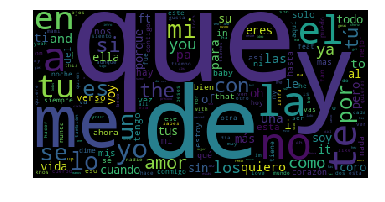

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Top 20 Uni-grams

que 12701
de 7552
me 7518
no 7154
la 6615
te 5984
el 5550
en 4064
tu 3681
yo 3645
mi 3242
lo 3106
se 2845
un 2699
es 2558
por 2506
si 2325
the 2118
con 2116
tú 1735


Text(0.5, 0, 'count')

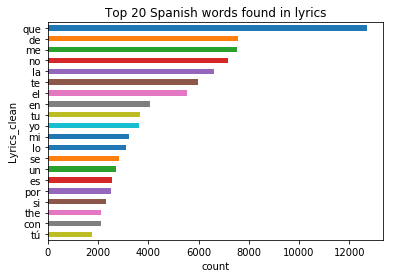

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Lyrics_clean'], 20)
for word, freq in common_words:
    print(word, freq)

df1 = pd.DataFrame(common_words, columns = ['Lyrics_clean' , 'count'])
df1.groupby('Lyrics_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 Spanish words found in lyrics')
plt.xlabel('count')

In [29]:
from stop_words import get_stop_words
stop_words = get_stop_words('es')

In [30]:
print(stop_words) #NLTK's list of 300 spanish stop words, github has a list of 730, SpaCy tagged 733 from lyrics

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fu

In [34]:
#stop_words = pd.DataFrame.from_dict({'stop_words':stop_words}) #takes list from dict into df to excel
#stop_words.to_excel('Spanish Stop Words.xlsx', index=True)

In [100]:
spanish_stopwords = r'\b(?:{})\b'.format('|'.join(stop_words)) #removes list of stopwords
df['Lyrics_nostop'] = df['Lyrics_clean'].str.replace(spanish_stopwords, '')

In [101]:
stop_words_en = get_stop_words('en')
english_stopwords = r'\b(?:{})\b'.format('|'.join(stop_words_en)) 
df['Lyrics_nostop_en'] = df['Lyrics_nostop'].str.replace(english_stopwords, '')

In [ ]:
df['Lyrics_nostop_en']

si 2325
amor 1670
quiero 1400
pa 1223
ft 950
vida 846
coro 764
oh 752
voy 668
verso 640
solo 627
baby 595
corazón 578
mas 562
así 558
ahora 552
sé 546
vez 534
bien 526
siempre 520


Text(0.5, 0, 'count')

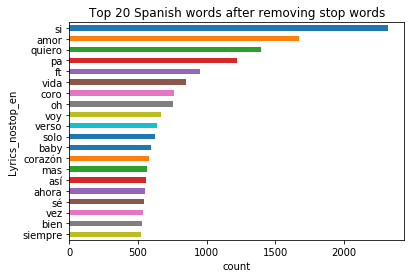

In [103]:
#without spanish and english stopwords
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Lyrics_nostop_en'], 20)
for word, freq in common_words:
    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['Lyrics_nostop_en' , 'count'])
df3.groupby('Lyrics_nostop_en').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 Spanish words after removing stop words')
plt.xlabel('count')

##### Bi-grams

lo que 1110
que me 1068
que no 987
que te 860
no me 796
no te 720
en la 668
de la 576
ya no 526
en el 512
que yo 480
es que 456
yo no 446
yo te 424
que se 399
te quiero 362
en mi 346
de mi 344
el amor 338
de tu 332


Text(0.5, 0, 'count')

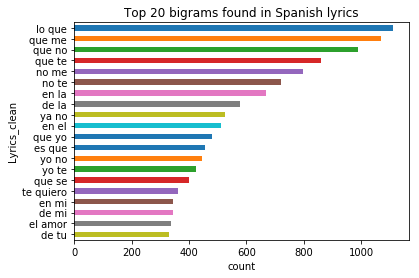

In [104]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Lyrics_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Lyrics_clean' , 'count'])
df2.groupby('Lyrics_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 bigrams found in Spanish lyrics')
plt.xlabel('count')

remix ft 137
si vas 113
si quieres 91
dime si 90
ele dominio 86
tal vez 80
pa arriba 78
miky woodz 74
oh ohoh 71
vaivén ven 66
natti natasha 66
solo quiero 64
mejor álbum 58
quiero ser 58
pa pa 55
manos pa 52
ohoh oh 48
echa palla 48
lets go 48
dos tres 46


Text(0.5, 0, 'count')

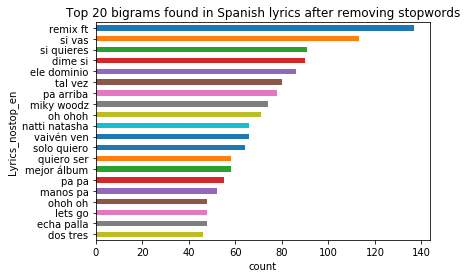

In [105]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Lyrics_nostop_en'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Lyrics_nostop_en' , 'count'])
df4.groupby('Lyrics_nostop_en').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 bigrams found in Spanish lyrics after removing stopwords')
plt.xlabel('count')

In [117]:
df['Lyrics_nodup_2'] = df['Lyrics_nostop_en'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1') #removes consecutive duplicates

In [118]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq) #no stopwords

remix ft 137
si vas 113
si quieres 91
dime si 90
ele dominio 86
tal vez 80
pa arriba 78
miky woodz 74
oh ohoh 71
vaivén ven 66
natti natasha 66
solo quiero 64
mejor álbum 58
quiero ser 58
manos pa 52
ohoh oh 48
echa palla 48
lets go 48
dos tres 46
tan solo 45
ft intro 45
pa ca 44
cada vez 44
cada día 43
know want 43
dr evil 43
pa abajo 42
jon ele 42
let love 41
give got 41
si conmigo 40
boom vai 40
quiero hacerte 40
ñengo flow 40
quiero contigo 40
coro si 39
anuel aa 39
ser feliz 39
ft miky 37
quiero ver 37
vai vaivén 36
sebastián yatra 36
primera vez 36
hace tiempo 35
ven pa 34
si digo 34
ven boom 34
salga sol 34
arriba pa 33
loco amor 33


##### Tri-grams

In [119]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Lyrics_nodup_2'], 100)
for word, freq in common_words:
    print(word, freq)

manos pa arriba 52
oh ohoh oh 48
jon ele dominio 38
ohoh oh ohoh 38
ft miky woodz 37
vai vaivén ven 36
boom vai vaivén 36
vaivén ven boom 34
sube manos pa 32
pa arriba pa 32
ven boom vai 30
dê tudo noite 30
hey mama hey 27
voy reír voy 26
vente pa ca 24
loca tigre loca 24
gonna good night 24
tonights gonna good 24
echa palla mano 24
noite dê tudo 24
mano echa palla 24
palla mano echa 24
vamo ser feliz 24
mejor álbum música 22
dime si vas 22
chi bon quiere 21
eh ah eh 21
ah eh ah 21
pa mente flote 21
pa abajo lado 20
lado pa lado 20
arriba pa abajo 20
oh ooh uh 20
wo oh pa 20
pon manos pa 20
ven pa ca 20
ooh uh oh 20
vas si vas 20
abajo lado pa 20
solo quiero darte 20
oh pa mente 20
déjame robarte beso 20
ft ñengo flow 20
quiero darte beso 19
girl look body 18
noite eu quero 18
tigre loca tigre 18
eh ay oh 18
know want know 18
echa palla say 18
dámelo papi chulo 18
mama hey mama 18
ay eh ay 18
rato hacemo rato 18
ai eu pego 18
eu quero você 18
hacemo rato hacemo 18
tudo noite dê 18
si v

While the trigrams have some useful word phrases, as we go on though quadgrams and onto decagrams, it is evident that the lyrics have useless words repeated in the songs that affect the ngram extraction. Additional cleaning of the lyrics to remove duplicate patterns of words is needed.

##### Quad-grams

In [120]:
def get_top_n_quadgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_quadgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

oh ohoh oh ohoh 38
boom vai vaivén ven 36
sube manos pa arriba 32
vaivén ven boom vai 30
vai vaivén ven boom 30
ven boom vai vaivén 30
palla mano echa palla 24
tonights gonna good night 24
noite dê tudo noite 24
echa palla mano echa 24
eh ah eh ah 21
cant read cant read 20
abajo lado pa lado 20
pon manos pa arriba 20
wo oh pa mente 20
pa abajo lado pa 20
pa arriba pa abajo 20
arriba pa abajo lado 20
oh ooh uh oh 20
manos pa arriba pa 20
oh pa mente flote 20
ohoh oh ohoh oh 19
tigre loca tigre loca 18
mano echa palla say 18
hey mama hey mama 18
dê tudo noite dê 18
mama hey mama hey 18
loca tigre loca tigre 18
hacemo rato hacemo rato 18
tudo noite dê tudo 18
ay eh ay oh 18
ah eh ah eh 18
solo quiero darte beso 17
good night tonights gonna 16
found love hopeless place 16
voy reír voy bailar 16
let love let love 16
want cha want cha 16
si vas si vas 16
puedo contener puedo contener 16
know want cha want 16
know want know want 16
want know want cha 16
give got shorty make 16
gonna good nigh

##### Quint-grams

In [121]:
def get_top_n_quintgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(5, 5)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_quintgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

ven boom vai vaivén ven 30
vaivén ven boom vai vaivén 30
vai vaivén ven boom vai 30
boom vai vaivén ven boom 30
echa palla mano echa palla 24
pa arriba pa abajo lado 20
pa abajo lado pa lado 20
manos pa arriba pa abajo 20
wo oh pa mente flote 20
arriba pa abajo lado pa 20
sube manos pa arriba pa 20
oh ohoh oh ohoh oh 19
loca tigre loca tigre loca 18
tudo noite dê tudo noite 18
hey mama hey mama hey 18
eh ah eh ah eh 18
palla mano echa palla say 18
dê tudo noite dê tudo 18
ah eh ah eh ah 18
know want know want cha 16
good night tonights gonna good 16
give got shorty make impacto 16
gonna good night tonights gonna 16
want know want cha want 16
night tonights gonna good night 16
tonights gonna good night tonights 16
know want cha want cha 16
oh pa mente flote wo 15
mente flote wo oh pa 15
pa mente flote wo oh 15
flote wo oh pa mente 15
pa lado sube manos pa 14
quiero hacerte dime vas hacer 14
prepárate quiero hacerte dime vas 14
abajo lado pa lado sube 14
lado pa lado sube manos 14
lado s

##### Sex-grams

In [122]:
def get_top_n_sexgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(6, 6)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_sexgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

boom vai vaivén ven boom vai 30
vai vaivén ven boom vai vaivén 30
vaivén ven boom vai vaivén ven 30
ven boom vai vaivén ven boom 24
arriba pa abajo lado pa lado 20
pa arriba pa abajo lado pa 20
manos pa arriba pa abajo lado 20
sube manos pa arriba pa abajo 20
echa palla mano echa palla say 18
dê tudo noite dê tudo noite 18
eh ah eh ah eh ah 18
know want know want cha want 16
want know want cha want cha 16
good night tonights gonna good night 16
gonna good night tonights gonna good 16
tonights gonna good night tonights gonna 16
wo oh pa mente flote wo 15
ah eh ah eh ah eh 15
flote wo oh pa mente flote 15
oh pa mente flote wo oh 15
pa mente flote wo oh pa 15
mente flote wo oh pa mente 15
abajo lado pa lado sube manos 14
prepárate quiero hacerte dime vas hacer 14
pa lado sube manos pa arriba 14
lado pa lado sube manos pa 14
lado sube manos pa arriba pa 14
pa abajo lado pa lado sube 14
oh ohoh oh ohoh oh ohoh 13
mami pare acércate pantalón dale vamo 12
conmigo gusta vente conmigo gusta sol

##### Sept-grams

In [123]:
def get_top_n_septgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(7, 7)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_septgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

vai vaivén ven boom vai vaivén ven 30
boom vai vaivén ven boom vai vaivén 30
vaivén ven boom vai vaivén ven boom 24
ven boom vai vaivén ven boom vai 24
sube manos pa arriba pa abajo lado 20
pa arriba pa abajo lado pa lado 20
manos pa arriba pa abajo lado pa 20
gonna good night tonights gonna good night 16
know want know want cha want cha 16
tonights gonna good night tonights gonna good 16
eh ah eh ah eh ah eh 15
oh pa mente flote wo oh pa 15
mente flote wo oh pa mente flote 15
pa mente flote wo oh pa mente 15
wo oh pa mente flote wo oh 15
ah eh ah eh ah eh ah 15
lado sube manos pa arriba pa abajo 14
abajo lado pa lado sube manos pa 14
pa lado sube manos pa arriba pa 14
pa abajo lado pa lado sube manos 14
arriba pa abajo lado pa lado sube 14
lado pa lado sube manos pa arriba 14
si pasas rato vamo ser feliz vamo 12
conmigo quiere hacer travesuras vuelto locura bien 12
love hopeless place found love hopeless place 12
llama sé dónde llegaste pregunté único sé 12
bailando mami pare acércate

##### Oct-grams

In [124]:
def get_top_n_octgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(8, 8)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_octgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

boom vai vaivén ven boom vai vaivén ven 30
ven boom vai vaivén ven boom vai vaivén 24
vai vaivén ven boom vai vaivén ven boom 24
vaivén ven boom vai vaivén ven boom vai 24
sube manos pa arriba pa abajo lado pa 20
manos pa arriba pa abajo lado pa lado 20
tonights gonna good night tonights gonna good night 16
pa mente flote wo oh pa mente flote 15
oh pa mente flote wo oh pa mente 15
wo oh pa mente flote wo oh pa 15
eh ah eh ah eh ah eh ah 15
lado sube manos pa arriba pa abajo lado 14
lado pa lado sube manos pa arriba pa 14
arriba pa abajo lado pa lado sube manos 14
pa lado sube manos pa arriba pa abajo 14
pa abajo lado pa lado sube manos pa 14
abajo lado pa lado sube manos pa arriba 14
pa arriba pa abajo lado pa lado sube 14
viva vida siga fiesta manos cintura así va 12
vas voy si das doy amor bailamos diez 12
want cha know want know want cha want 12
cómo llama sé dónde llegaste pregunté único sé 12
know want know want cha want cha know 12
voy si das doy amor bailamos diez duelan 12
llam

##### Non-grams

In [125]:
def get_top_n_octgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(9, 9)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_octgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

vai vaivén ven boom vai vaivén ven boom vai 24
boom vai vaivén ven boom vai vaivén ven boom 24
vaivén ven boom vai vaivén ven boom vai vaivén 24
ven boom vai vaivén ven boom vai vaivén ven 24
sube manos pa arriba pa abajo lado pa lado 20
wo oh pa mente flote wo oh pa mente 15
oh pa mente flote wo oh pa mente flote 15
lado sube manos pa arriba pa abajo lado pa 14
pa lado sube manos pa arriba pa abajo lado 14
manos pa arriba pa abajo lado pa lado sube 14
abajo lado pa lado sube manos pa arriba pa 14
lado pa lado sube manos pa arriba pa abajo 14
pa arriba pa abajo lado pa lado sube manos 14
arriba pa abajo lado pa lado sube manos pa 14
pa abajo lado pa lado sube manos pa arriba 14
ah eh ah eh ah eh ah eh ah 12
know want cha want cha know want know want 12
bailando mami pare acércate pantalón dale vamo pegarno animales 12
atrás cinturita así va vamo allá ponle siente ritmo 12
dime si conmigo quiere hacer travesuras vuelto locura bien 12
mantenemos amamos ay vamos ah pena daría tenerte vida

##### Dec-grams

In [126]:
def get_top_n_octgram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(10, 10)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_octgram(df['Lyrics_nodup_2'], 50)
for word, freq in common_words:
    print(word, freq)

vai vaivén ven boom vai vaivén ven boom vai vaivén 24
boom vai vaivén ven boom vai vaivén ven boom vai 24
vaivén ven boom vai vaivén ven boom vai vaivén ven 24
ven boom vai vaivén ven boom vai vaivén ven boom 18
wo oh pa mente flote wo oh pa mente flote 15
lado sube manos pa arriba pa abajo lado pa lado 14
arriba pa abajo lado pa lado sube manos pa arriba 14
pa abajo lado pa lado sube manos pa arriba pa 14
sube manos pa arriba pa abajo lado pa lado sube 14
pa arriba pa abajo lado pa lado sube manos pa 14
manos pa arriba pa abajo lado pa lado sube manos 14
lado pa lado sube manos pa arriba pa abajo lado 14
pa lado sube manos pa arriba pa abajo lado pa 14
abajo lado pa lado sube manos pa arriba pa abajo 14
want know want cha want cha know want know want 12
reggaetón dale sigue bailando mami pare acércate pantalón dale vamo 12
llama sé dónde llegaste pregunté único sé quiero usted quedarme 12
alante paso atrás cinturita así va vamo allá ponle siente 12
peleamos arreglamos mantenemos amamo

### Conclusion:
Extracting Ngrams is a useful practice in natural language processing. However, extracting them from song lyrics is not useful to develop a set of phrases to help learn a langauge. It might be better to use newspapers, magazines, and media articles instead.